### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [5]:
#Importing required liberaris.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


%matplotlib inline
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

In [6]:
# import dataset ans reading system saved file

df = pd.read_csv('baseball.txt')

df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In the above cell we are taking a look at our dataset which seems to be very small but due to the columns not being descriptive we are unable to understand the content much. We will take help from the Wikipedia link that was provided to get further insights on our dataset during it's analysis process .
we rename columns w.r.f https://en.wikipedia.org/wiki/Baseball_statistics which is given to us .

In [7]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [8]:
df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


After renaming it is easy to undersatand and analyse data

In [9]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.tail()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [11]:
df.sample()


,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95


In [18]:
df.shape # indicating total numbers of rows and column --30 rows and 17 columns


(30, 17)

In [16]:
df.info() # indicating all null/non-null values including datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

all columns's datatype has datatype int64 except Earned average Value(float 64).but each column has  numerical value so no processing is required

In [17]:
#indicating unique value in each columns.
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

In [20]:
#checking null values
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

There is no null values

In [22]:
#looking over all features
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [26]:

# unique values in TARGET column

df['Wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [ ]:
#Checking value counts of target column
df['W'].value_counts()

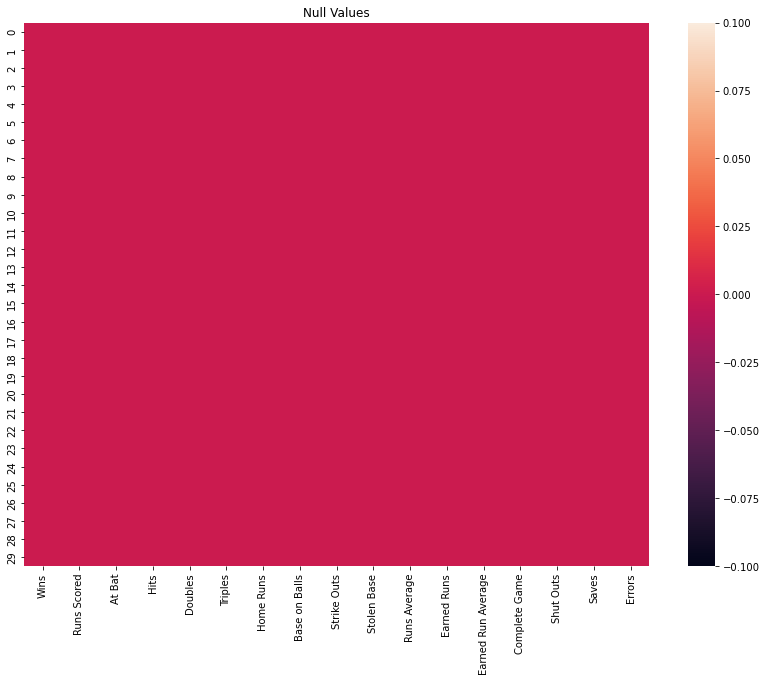

In [27]:
#Checking for null values in heat map
plt.figure(figsize=[14,10])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

## Statistical Information about Our Dataset

In [28]:
# Lets check statistical details of datset

df.describe()


,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


 Looking at the first column we can clearly see that all of them have 30.0 as their count confirming no missing values.

Also when we try to eye ball the other columns like mean, standard deviation, minimum values, 25% quartile, 50% quartile, 75% quartile and maximum values then they are seem to be progressing in a definite manner showing no visible abnormalities.
No negative values and Few columns have very low values in it and few have very high values in the datset.

In [30]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

# Data Visualization

### Univariate Analysis:


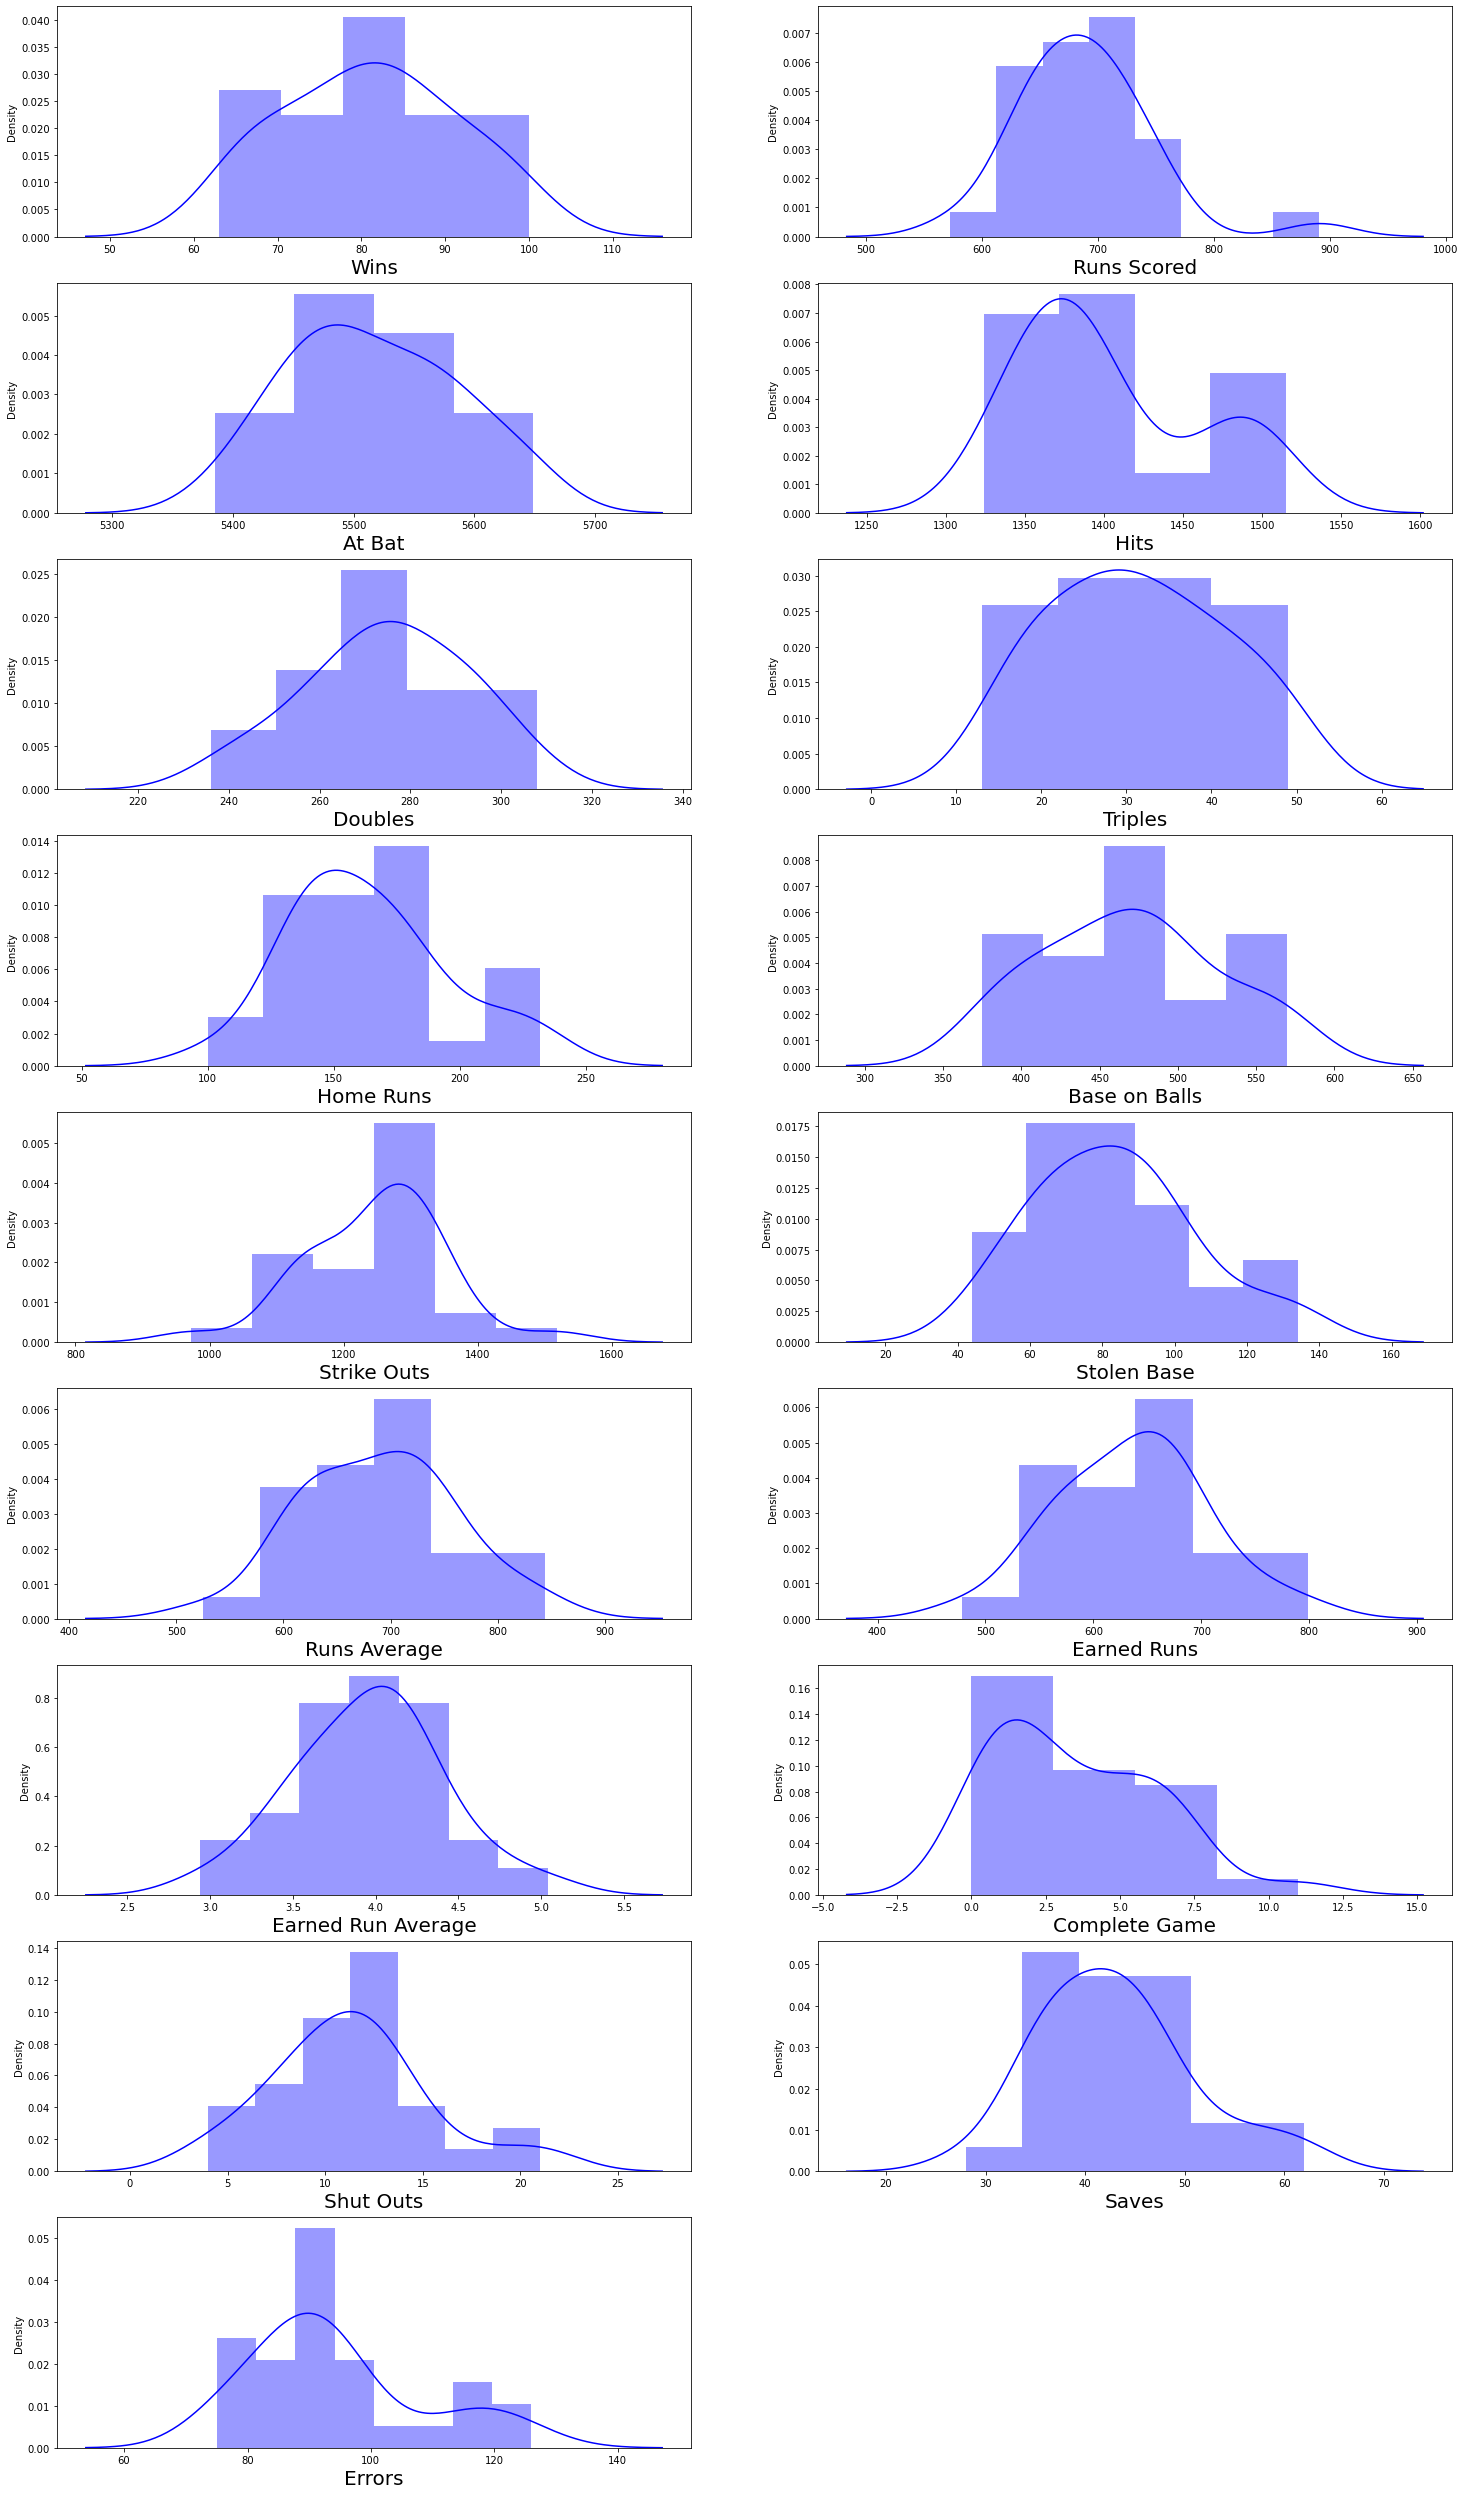

In [36]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed.Except for Runs Scored,Hits, Complete Game, Shut Outs and Errors columns that have slight skewness .

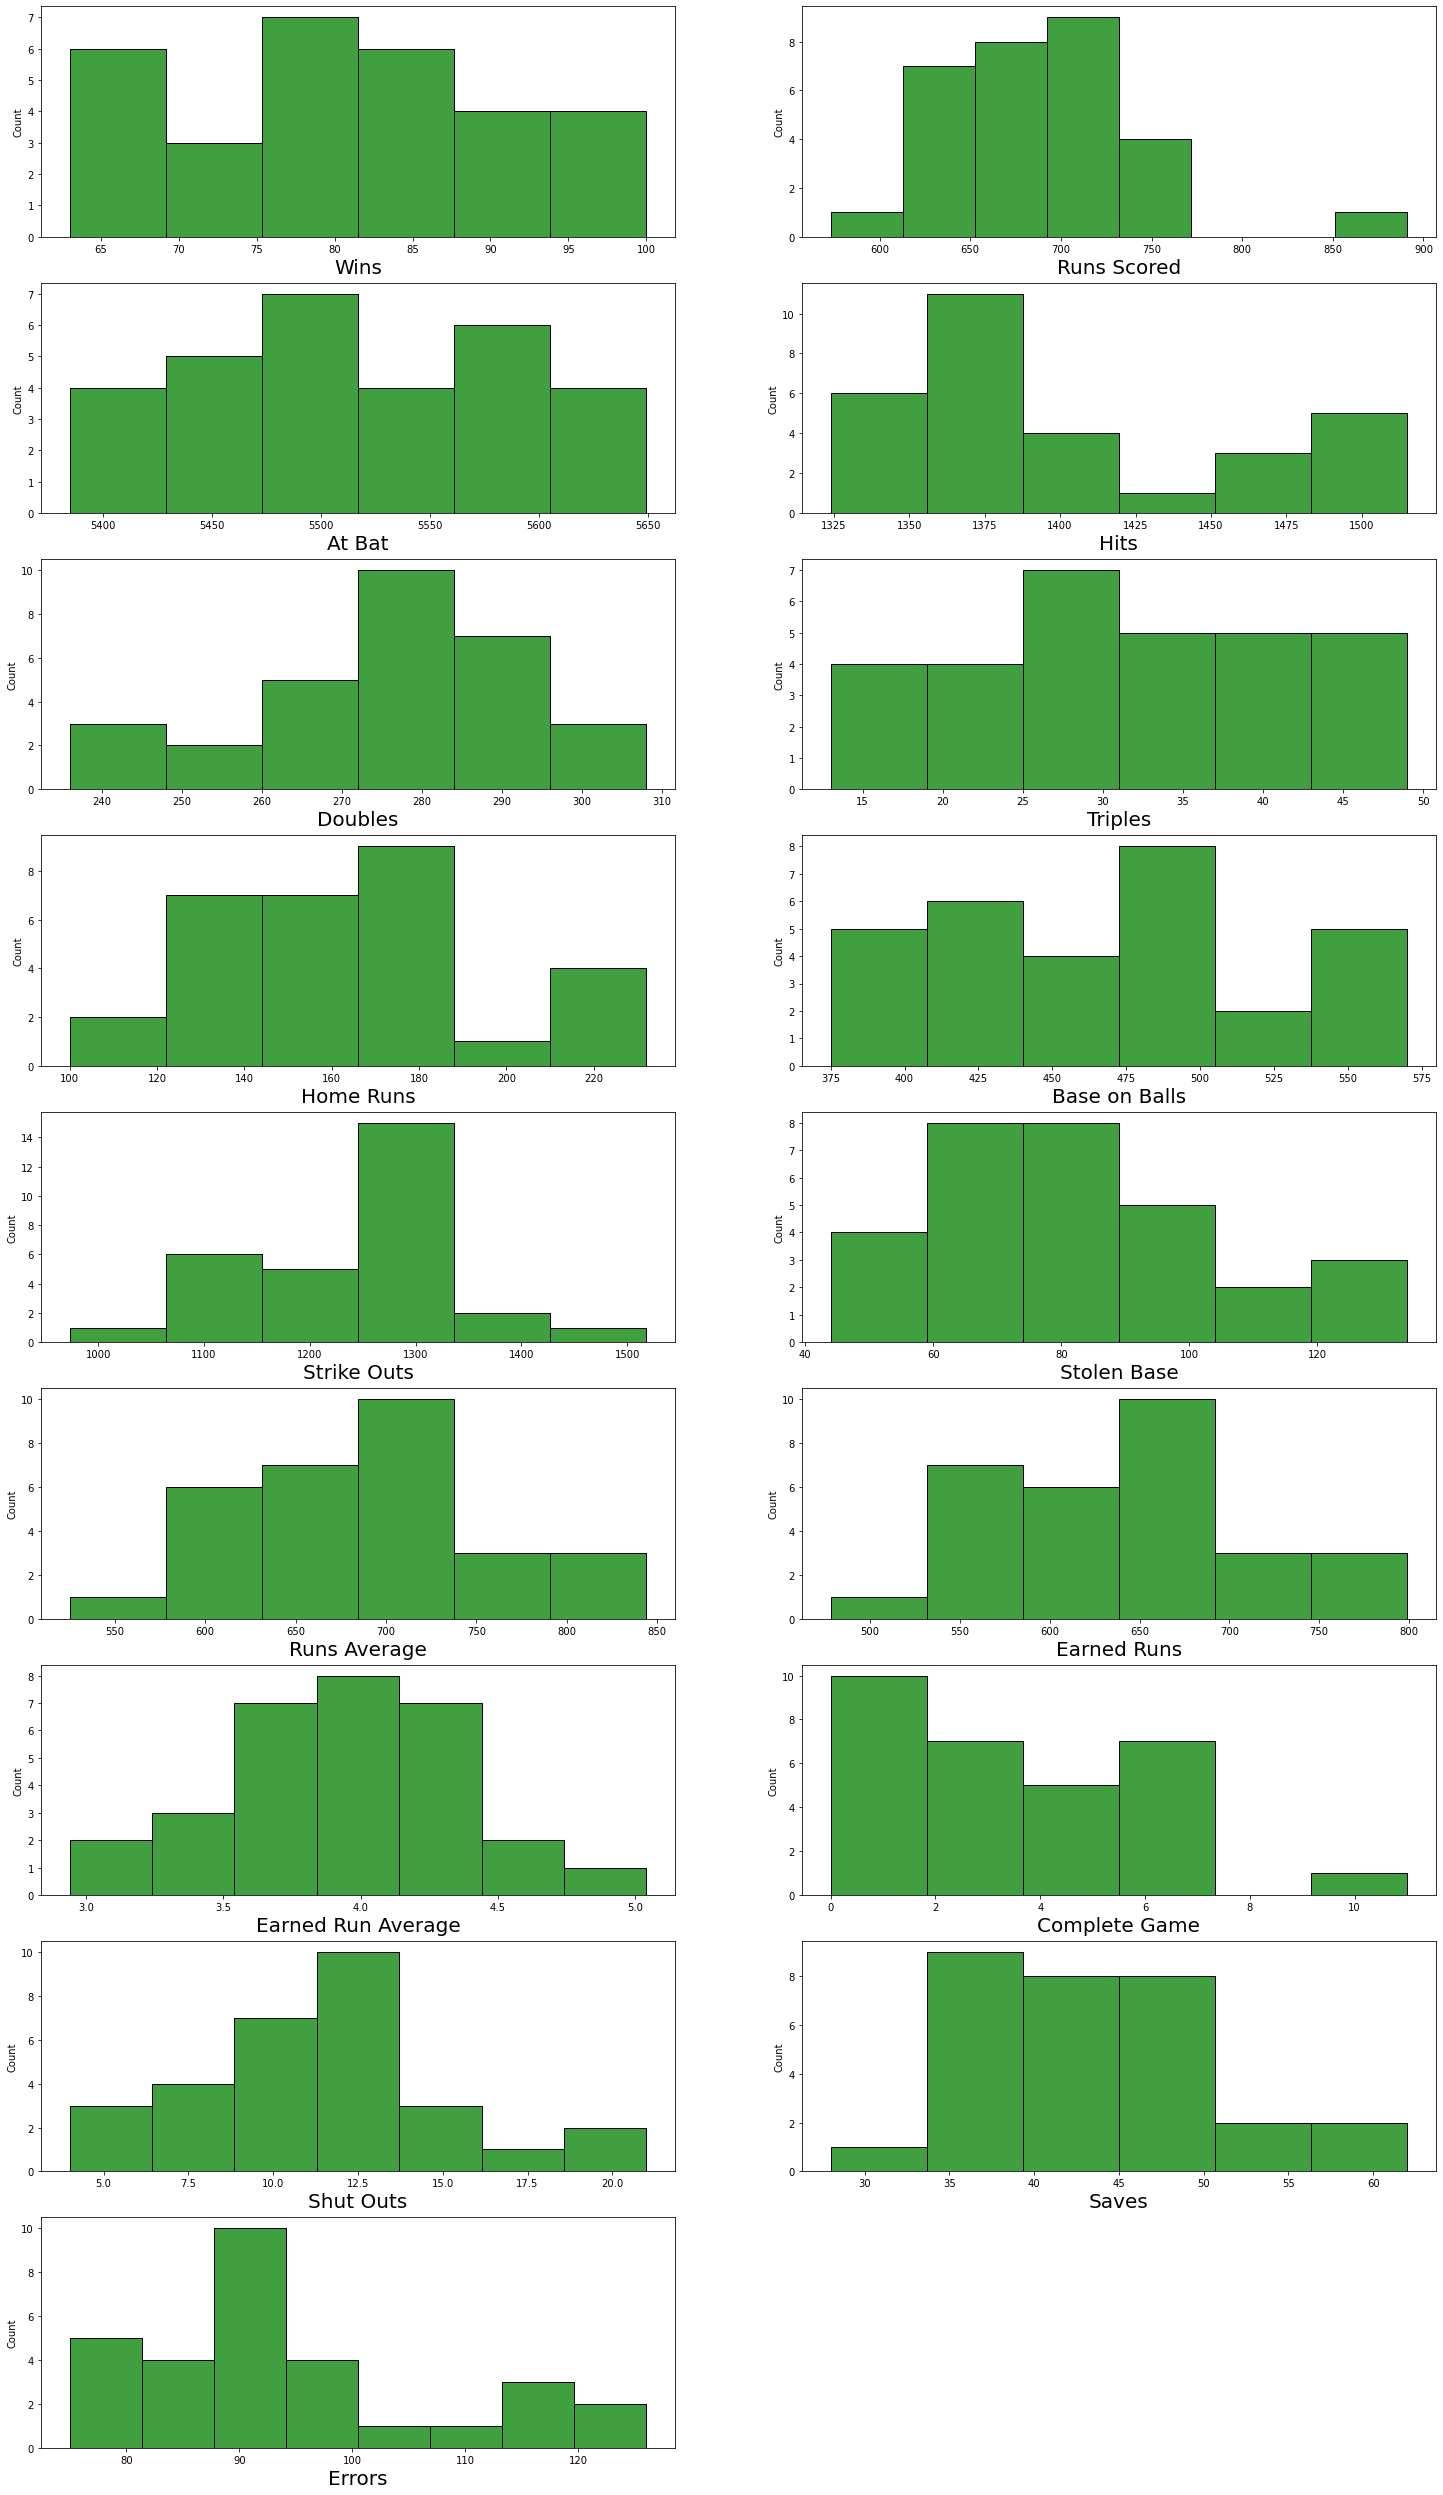

In [39]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

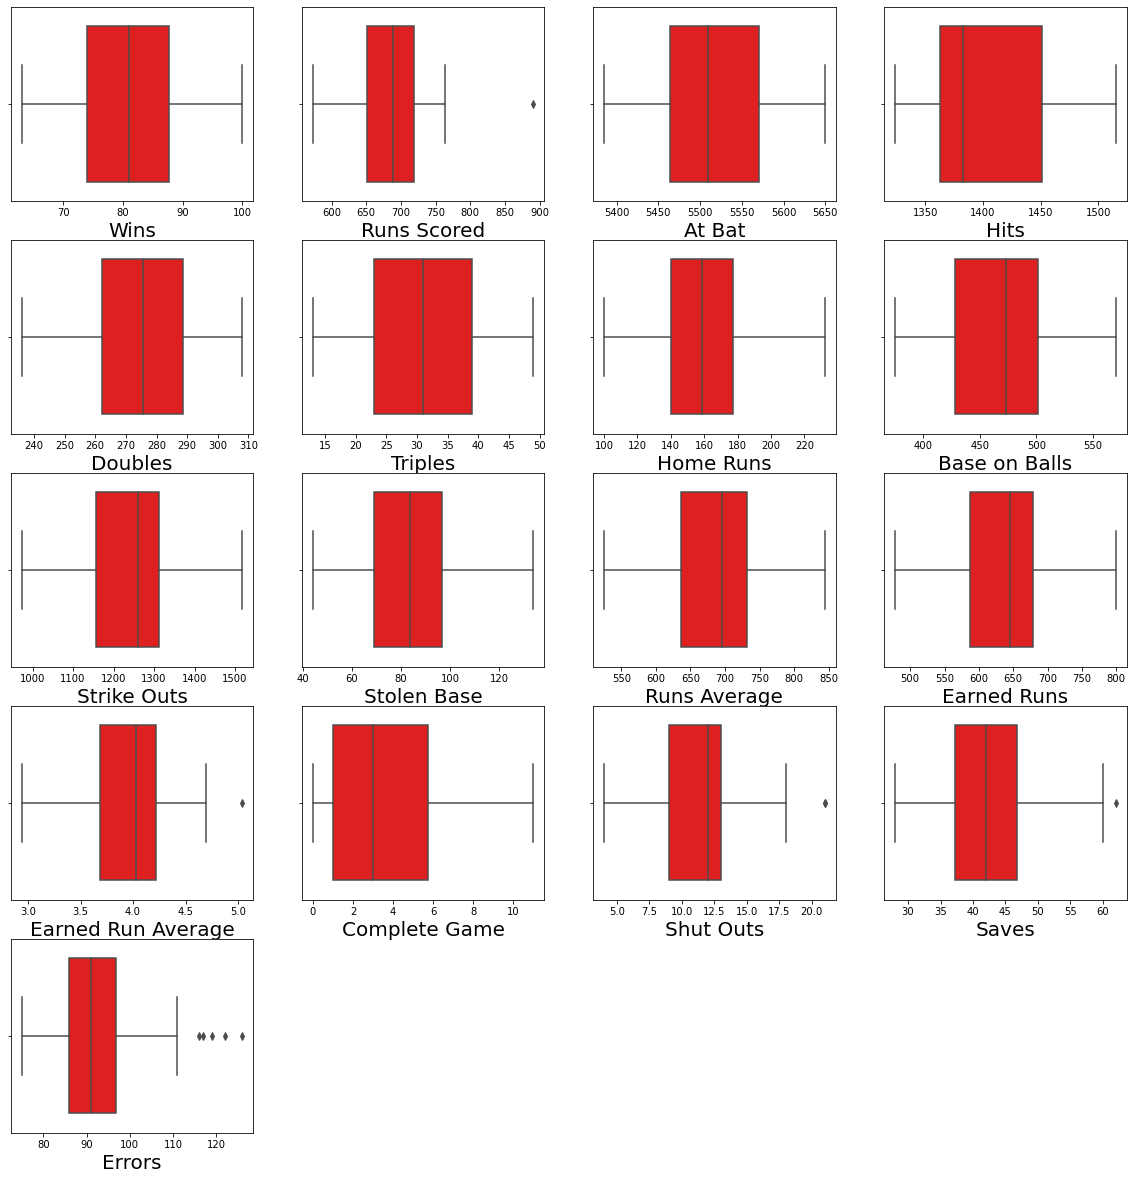

In [41]:
plt.figure(figsize = (20, 25), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(6, 4, plotnumber)
        sns.boxplot(df[column], color = 'r')
        plt.xlabel(column, fontsize = 20)
        plotnumber += 1

plt.show()


The above box plot representation clearly shows few outlier points present in Runs Scored, Earned Run Average, Shut Outs, Saves and Errors. These will need to be treated further before building our machine learning model.

### Bivariate Analysis

<Figure size 1800x1440 with 0 Axes>

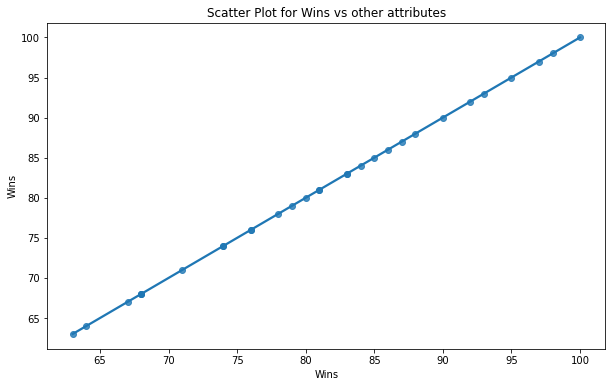

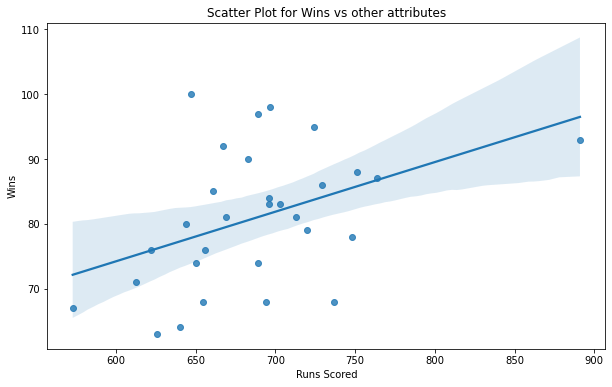

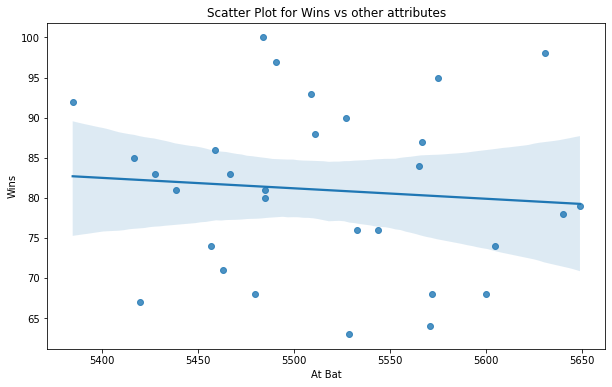

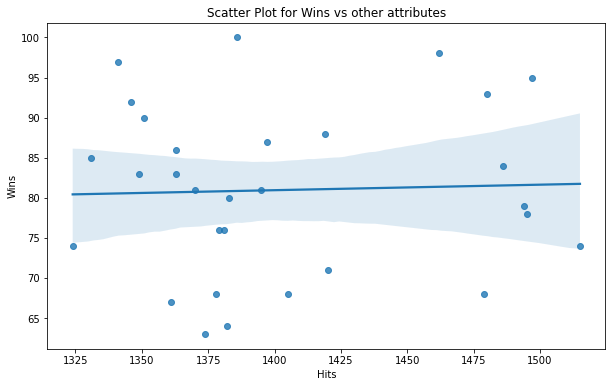

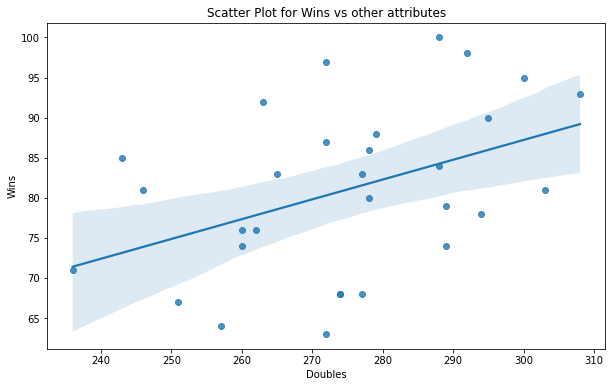

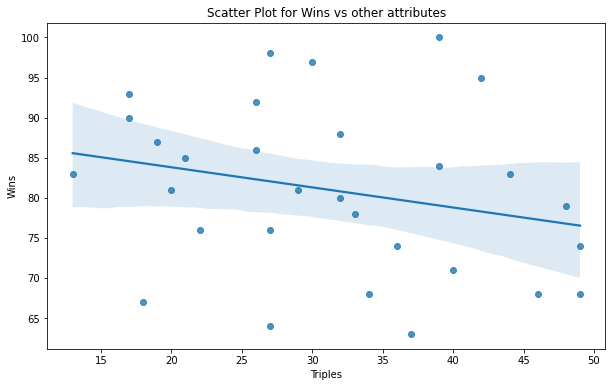

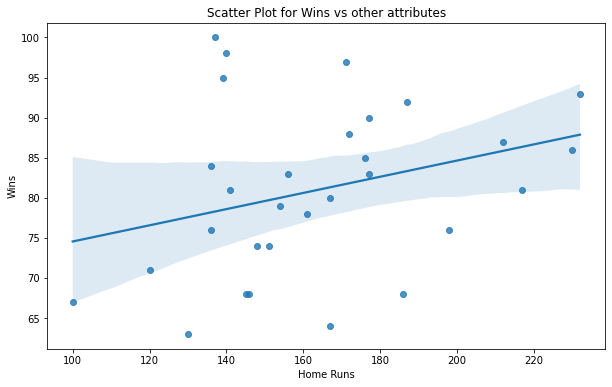

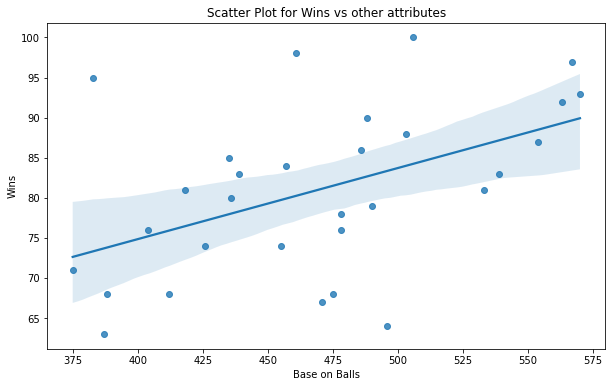

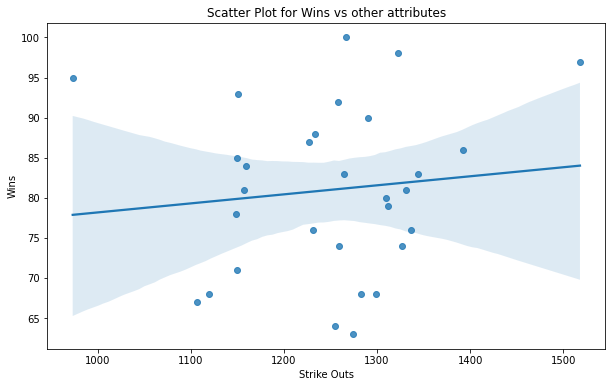

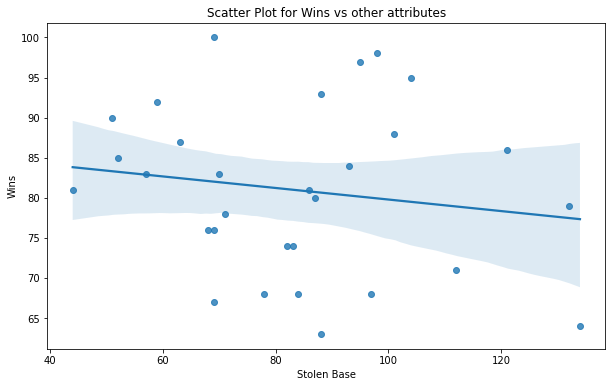

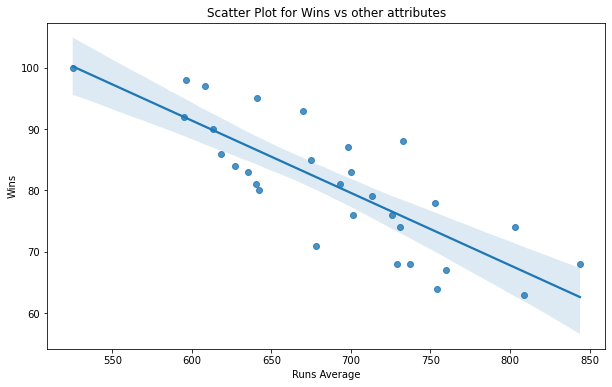

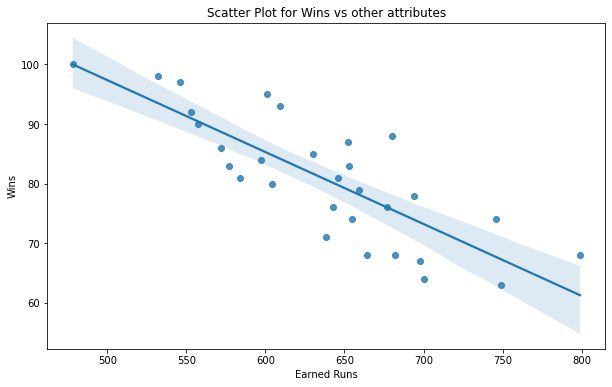

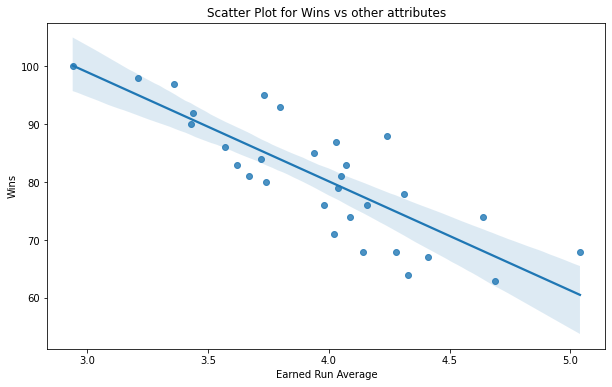

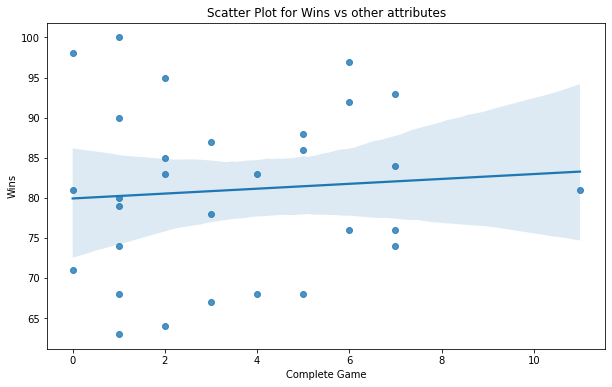

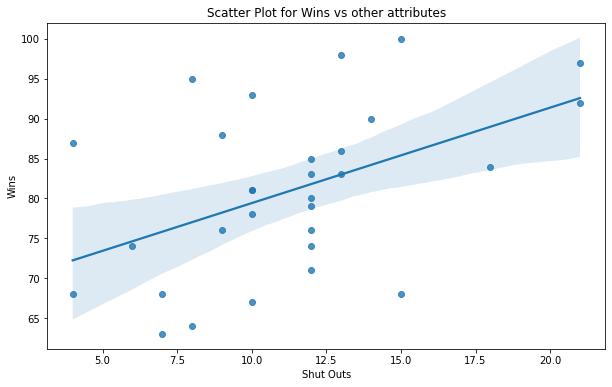

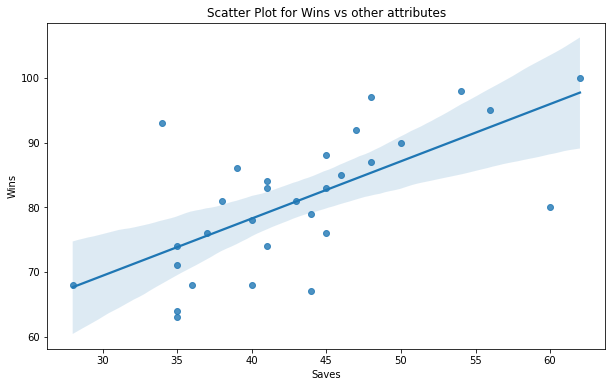

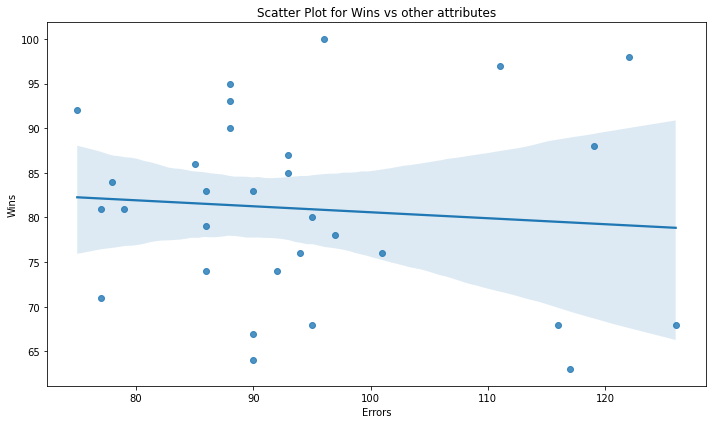

In [43]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['Wins'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('Wins')
        
plt.tight_layout()

Run Average,Earned Runs,Earned Run Average have good relation with Win. 

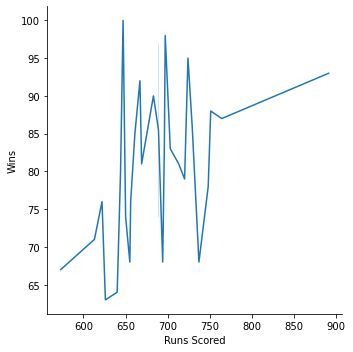

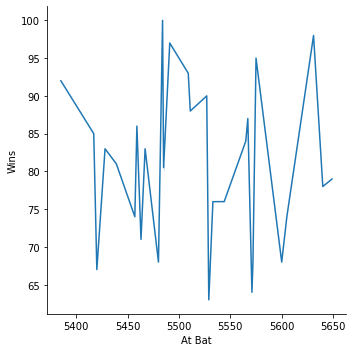

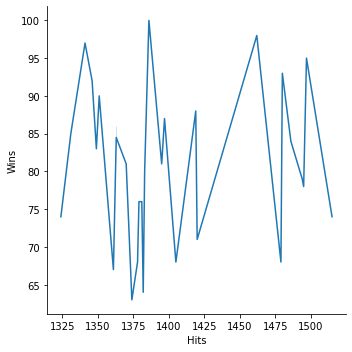

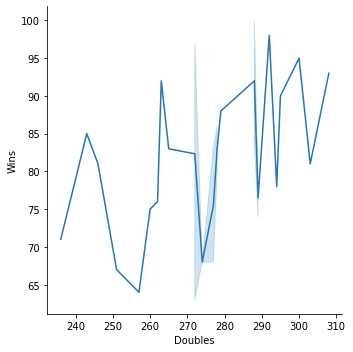

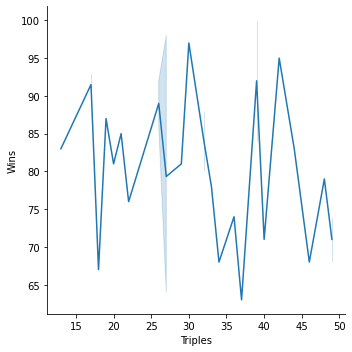

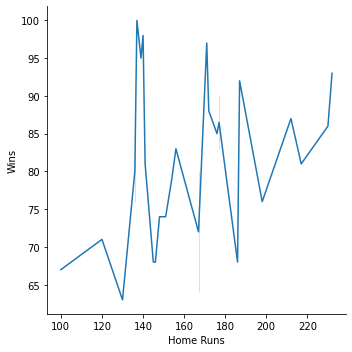

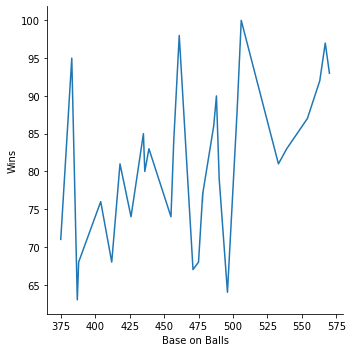

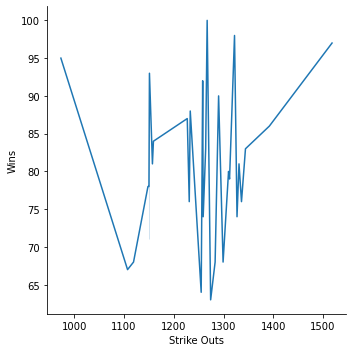

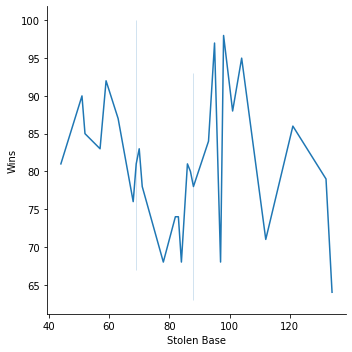

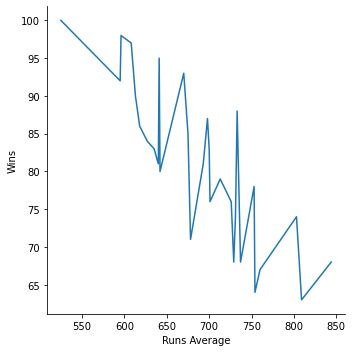

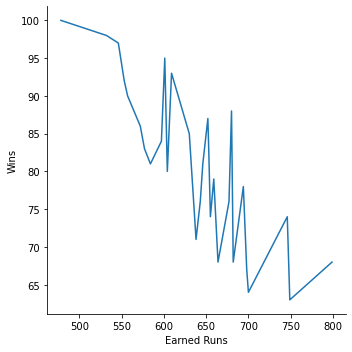

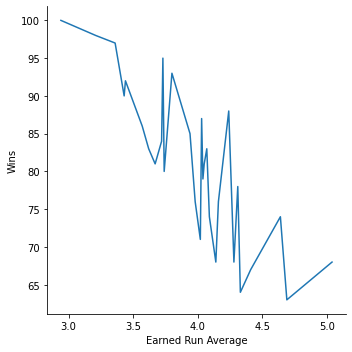

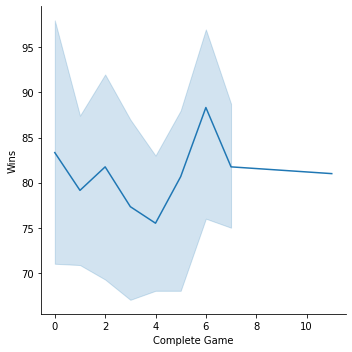

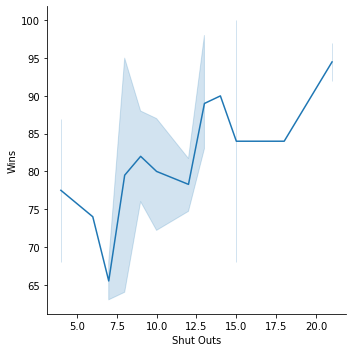

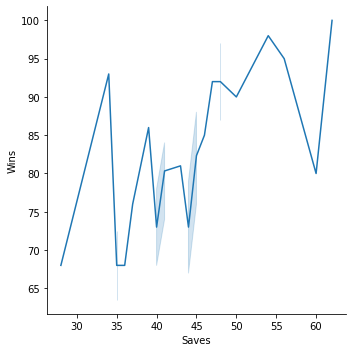

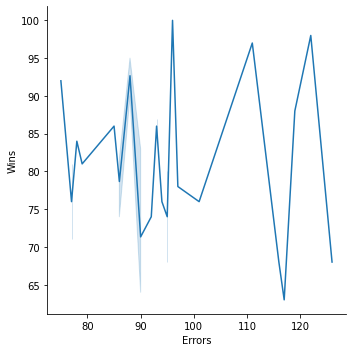

In [44]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

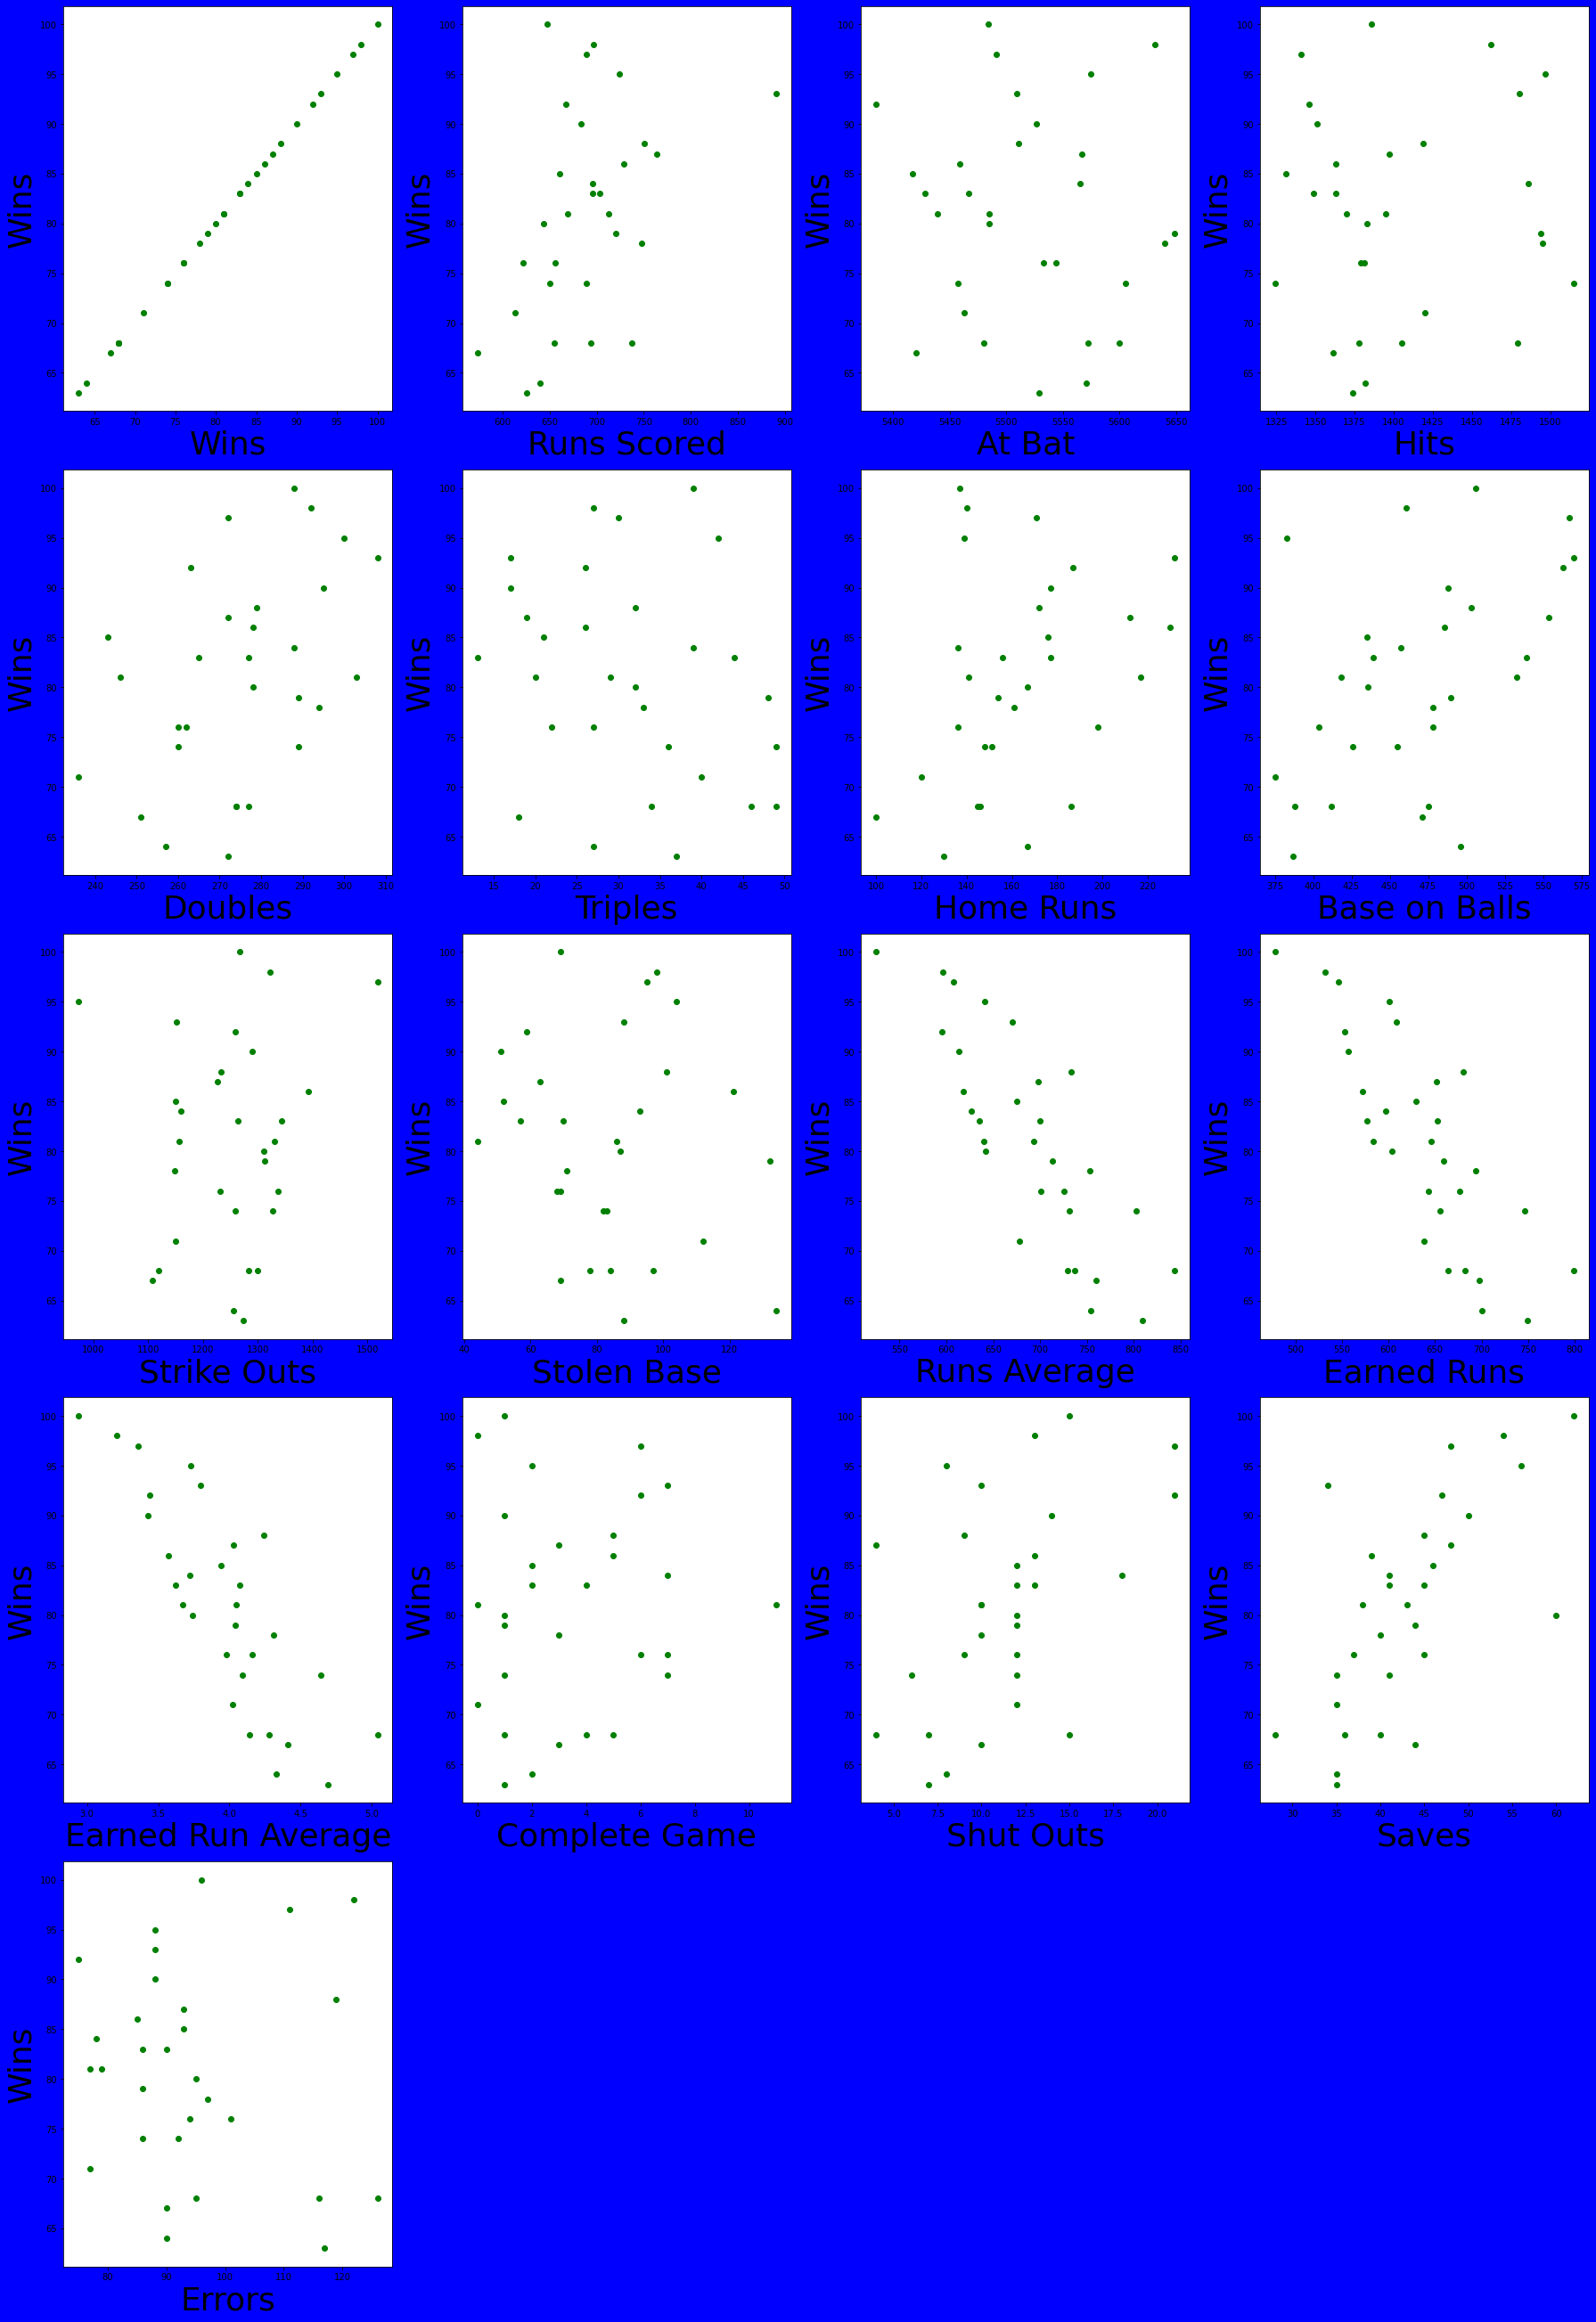

In [47]:
#Bivariate Analysis:
plt.figure(figsize = (25,50), facecolor = 'blue')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['Wins'], color='g')
        plt.xlabel(column,fontsize=36)
        plt.ylabel('Wins', fontsize=36)
    plotnumber += 1
plt.tight_layout()

    

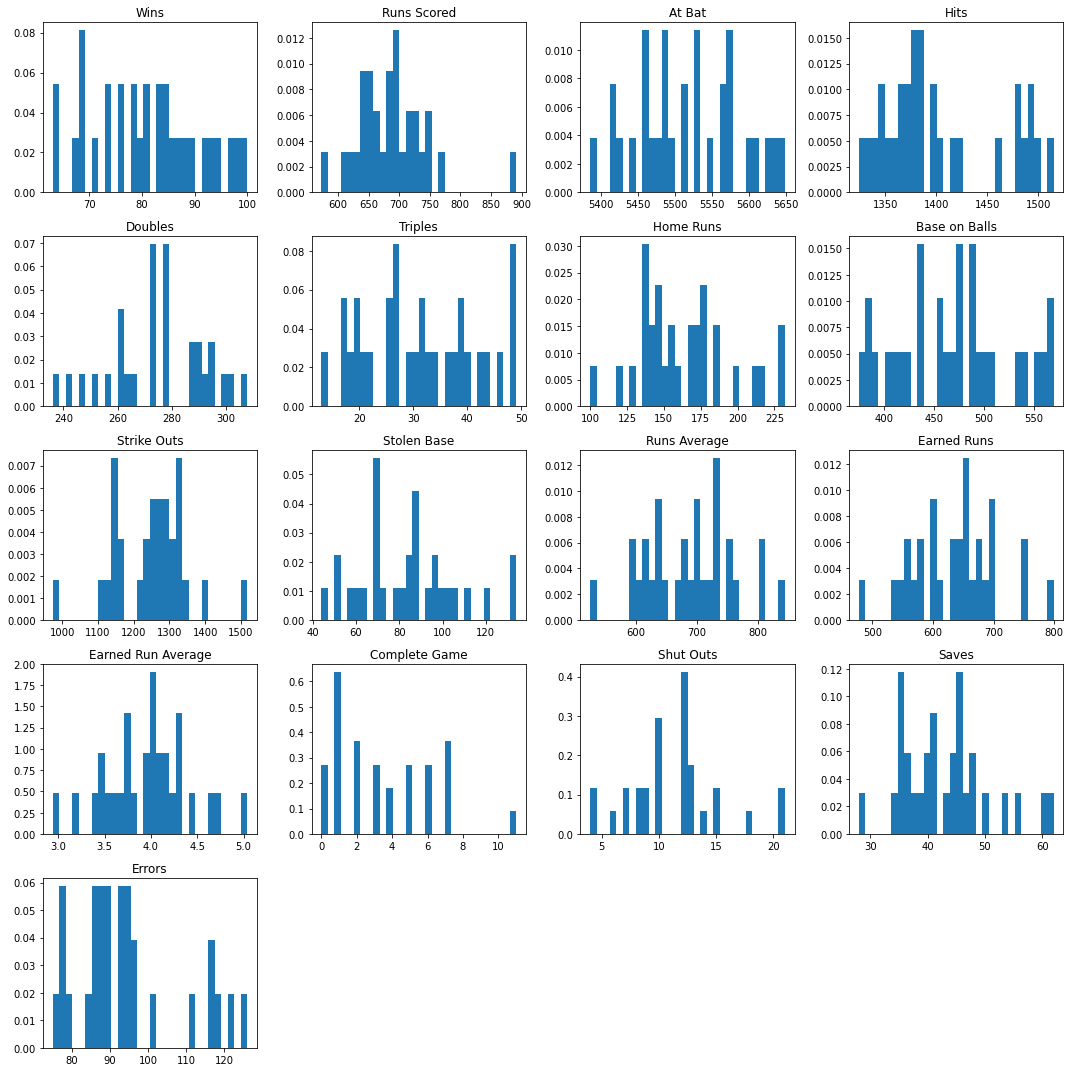

In [61]:
#Histogram
plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins = 30, density = 'True', label = 'Value',histtype = 'stepfilled', grid=False)
plt.tight_layout()
plt.show()

### Multivariate Analysis:

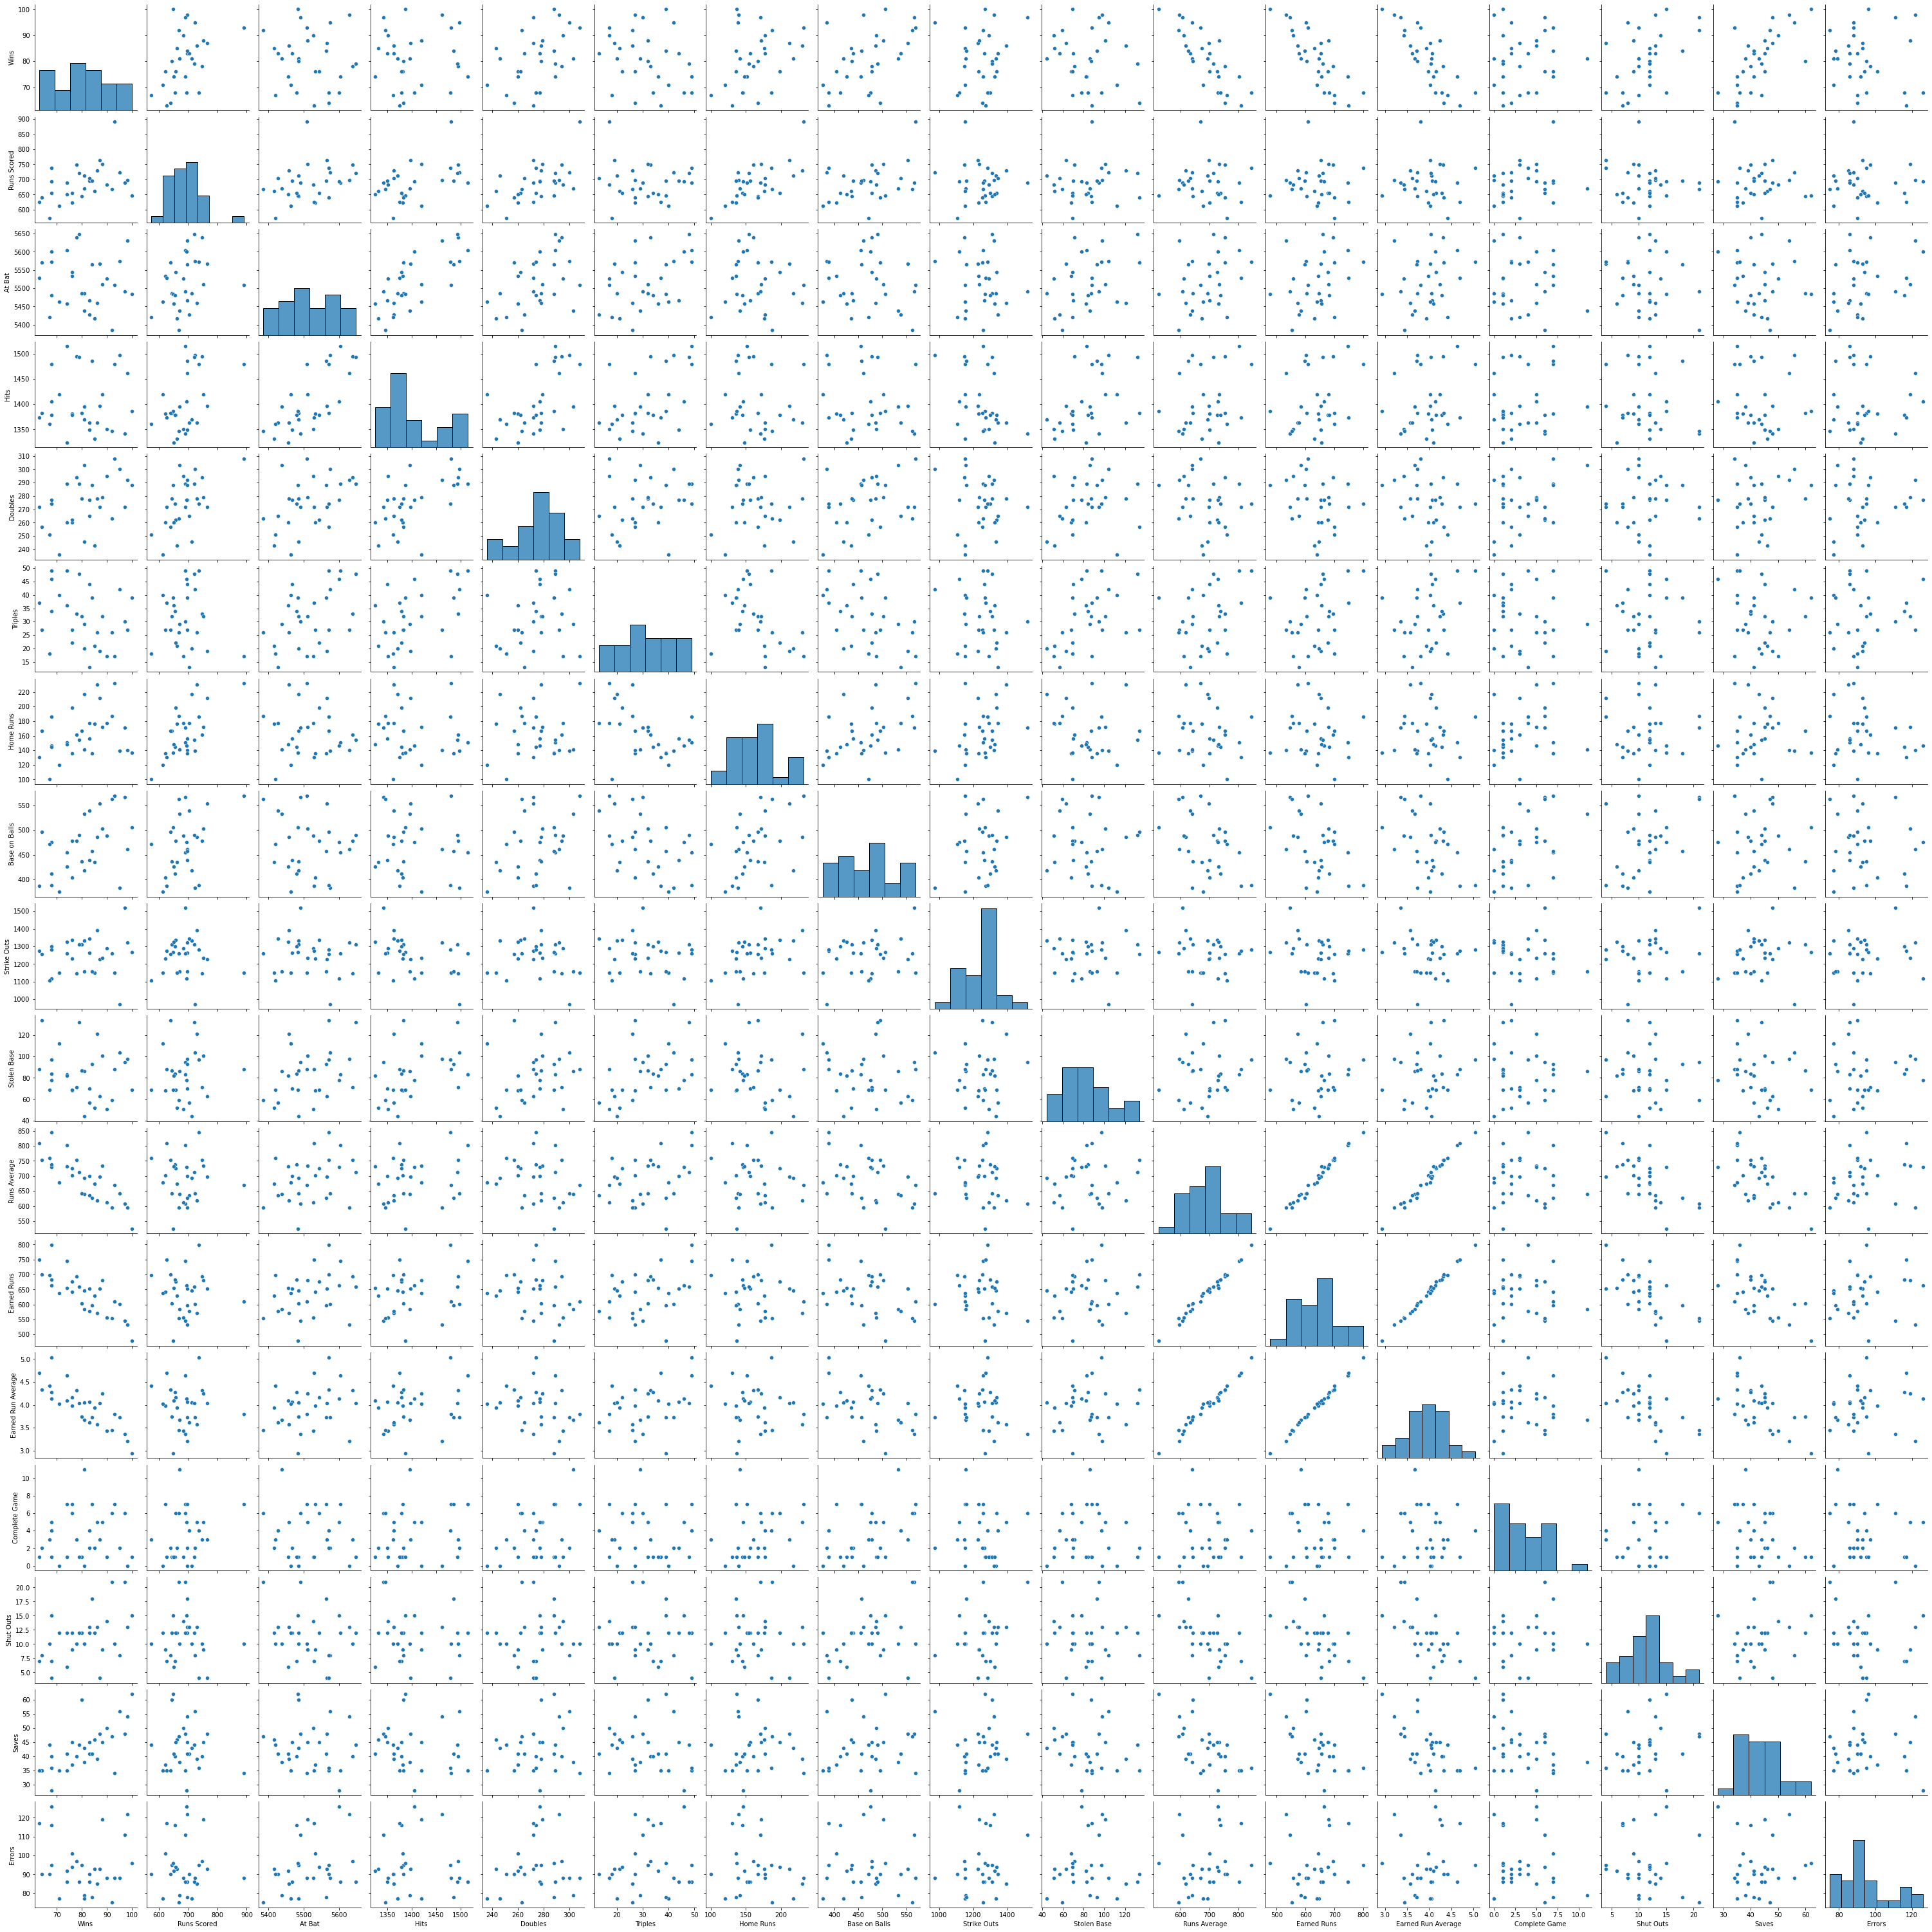

In [48]:

sns.pairplot(df)
plt.show()

### Correaltion 

In [55]:
df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


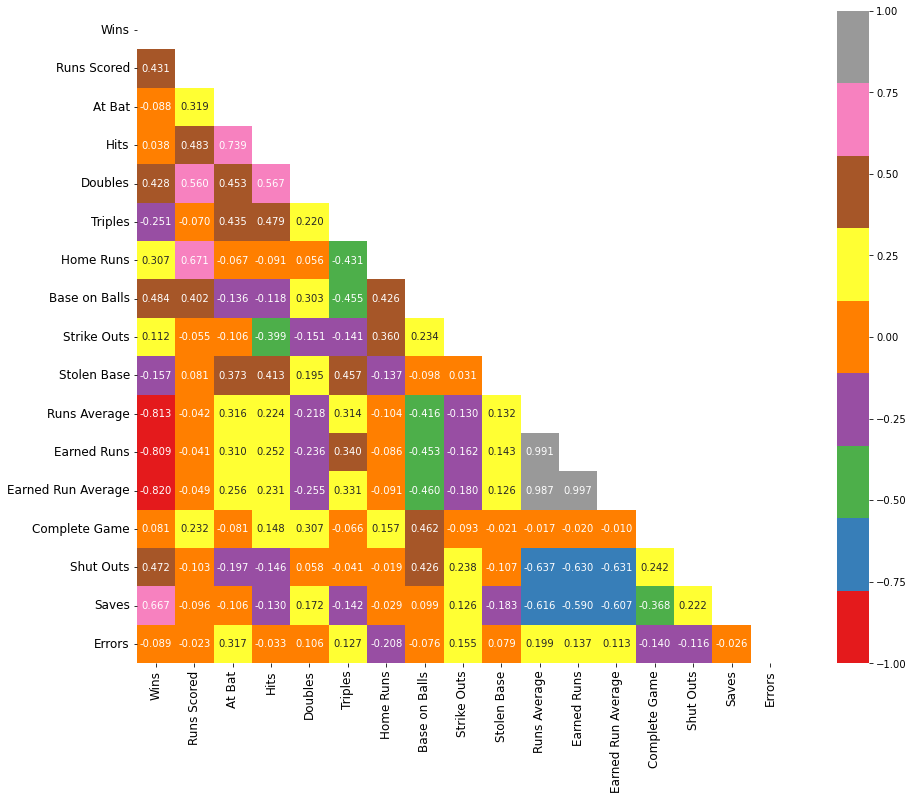

In [58]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Set1", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [59]:
df.corr()['Wins'].sort_values()

Earned Run Average   -0.819600
Runs Average         -0.812952
Earned Runs          -0.809435
Triples              -0.251118
Stolen Base          -0.157234
Errors               -0.089485
At Bat               -0.087947
Hits                  0.037612
Complete Game         0.080533
Strike Outs           0.111850
Home Runs             0.307407
Doubles               0.427797
Runs Scored           0.430751
Shut Outs             0.471805
Base on Balls         0.484342
Saves                 0.666530
Wins                  1.000000
Name: Wins, dtype: float64

In the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs Average", "Earned Runs" and "Earned Run Average". Also there is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average" data points. We may need to drop highly correlated columns to avoid this issue or I may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.

Visualizing the correlation between label and features using bar plot

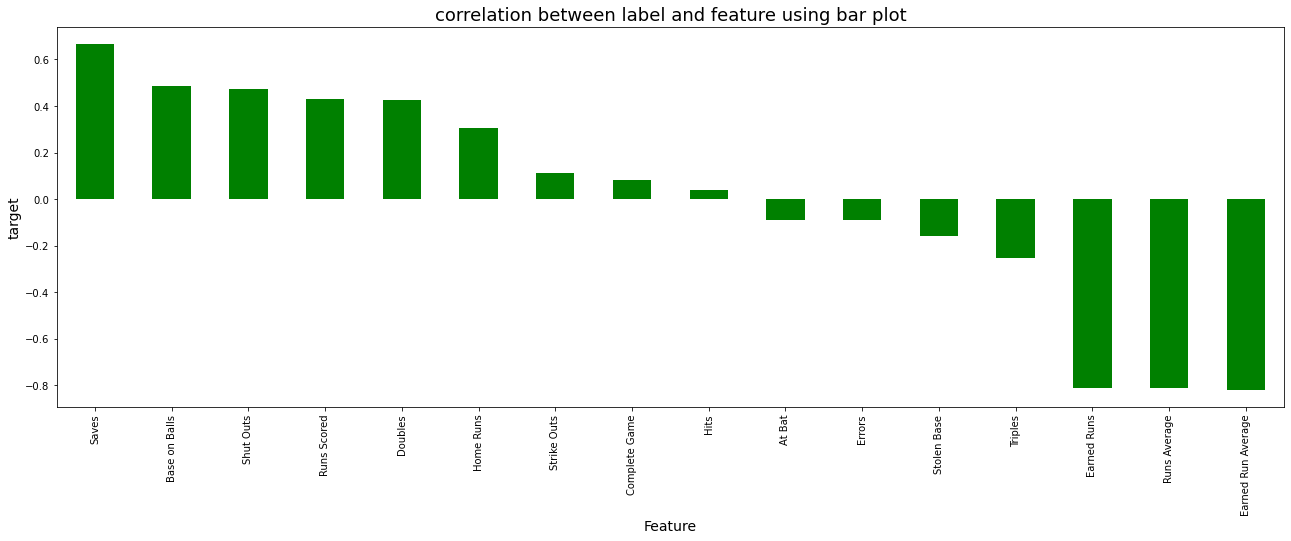

In [62]:
plt.figure(figsize=(22,7))
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()


. "Earned Runs", "Earned Run Average" and "Runs Average" have high negative correlation with "Wins".

### MultiCollinearity with Variance Inflation Factor

In [63]:
df1=pd.DataFrame(data=df)       # copying the dataframe
df1

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [64]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [65]:
x1

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [66]:
y1

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [67]:
x1.shape


(30, 16)

In [68]:
y1.shape

(30,)

In [69]:
# Importing Required Libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [73]:
calc_vif(x1)

,variables,VIF FACTOR
0,Runs Scored,1638.985029
1,At Bat,4277.157018
2,Hits,4698.798408
3,Doubles,904.439835
4,Triples,32.435486
5,Home Runs,285.773237
6,Base on Balls,269.485018
7,Strike Outs,398.234104
8,Stolen Base,28.654970
9,Runs Average,17204.829356


"Earned Runs" ,"Run Average" are having the highest Variance Inflation Factor hence we will drop it.

In [74]:
x1=df1.drop(['Earned Runs','Runs Average'],axis=1)


In [75]:
calc_vif(x1)

,variables,VIF FACTOR
0,Wins,1102.620419
1,Runs Scored,3061.013600
2,At Bat,4931.535495
3,Hits,4173.065128
4,Doubles,1062.721139
5,Triples,30.281934
6,Home Runs,238.479206
7,Base on Balls,259.044664
8,Strike Outs,333.976519
9,Stolen Base,26.970708




We can see that dropping 'Earned Runs','Runs Average' significantly reduces the variance inflation factor. Hence even though the VIF is higher still we will proceed after removing these 2 columns.


Since removing more than 2 columns wouldnt be feasible since the dataset is small.

# Data Preprocessing


### Data cleaning: 

In [76]:
df.drop(['Earned Runs','Runs Average'],axis=1,inplace=True)
df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


In [77]:

df.shape

(30, 15)

### Removing outliers

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.792164,0.171757,0.320914,0.396360,0.194303


In [79]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [80]:
#row and column
z.iloc[5,1]

3.5096470447193067

In [81]:
z.shape

(30, 15)

In [82]:
len(np.where(z>3)[0])
1

1

In [83]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (30, 15)
New Dataframe (29, 15)
total_dropped_rows 1


Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-3 zscore value.

In [84]:
loss_percent=(30-29)/30*100
print(loss_percent,'%')

3.3333333333333335 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

3.3333333333333335% data loss is acceptable.

In [85]:
# now our new dataset is df_new after removal of 3 column
df_new.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

 There are still few columns showing slight skewness with respect to the acceptable range of skewness that is +/-0.5.

## Seperating the dataset into Features and Target


In [86]:
X = df_new.iloc[:,1:]     # capital X
y = df_new.iloc[:,0]

In [87]:
X

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


In [88]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [89]:

X.shape

(29, 14)

In [90]:
y.shape

(29,)

In [91]:

X.skew()

Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

### Transforming data to remove skewness

In [92]:
#list of skewed features
skew_features=["Hits","Complete Games","Shut Outs","Saves","Errors"]

In [93]:
#Removing skewness in H using log1p
df_new["Hits"]=np.log1p(df_new["Hits"])

In [96]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [101]:
#Removing skewness using yeo-johnson
df_new[['Errors','Shut Outs','Saves','Complete Game']] = scaler.fit_transform(df_new[['Errors','Shut Outs','Saves','Complete Game']].values)


In [102]:
#Checking skewness after removing skewness
df_new.skew()


Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.738455
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs             0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

skewness is removed 

### Scaling the independant variable (x) to get all the columns in a standard scale

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.51138828,
        -0.50148589, -0.81326172,  1.64315663, -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.23895226,
        -0.50148589,  0.15929869,  0.21100645, -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.64380131,
         2.85461197, -0.32698152, -0.70036184, -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.04033271,
         1.36301292, -0.57012162, -0.83055731,  0.46365315],
       [ 0.17408438,  1.25589393,  2.0638879 ,  0.90831897,  1.70409425,
        -0.35329291, -0.19749523,  0.07293472, -0.01512442,  1.4968761 ,
         1.36301292,  0.15

 we performed scaling operation on all the independant variables columns to bring it into the same scale.



In [105]:
X.columns

Index(['Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls', 'Strike Outs', 'Stolen Base', 'Earned Run Average',
       'Complete Game', 'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [106]:
x = pd.DataFrame(x1,columns=X.columns)

In [107]:
x

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.614123,0.617213,-0.570122,0.211006,1.757915


In [109]:

calc_vif(x)

,variables,VIF FACTOR
0,Runs Scored,6.787762
1,At Bat,4.981743
2,Hits,8.569581
3,Doubles,3.416116
4,Triples,3.239565
5,Home Runs,6.590925
6,Base on Balls,3.081560
7,Strike Outs,2.106522
8,Stolen Base,1.842528
9,Earned Run Average,4.931066




 all the values are less than 10 which means we have solved the multicollinearity problem. let's move to model building.





### Machine Learning Data Model


In [110]:
#Since the y (Target) has continuous values we will use Linear Regression model
#Finding Best Random State
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()


In [111]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.9559822468233036
At random state 1, the testing accuracy is :  0.768442066186319


At random state 2, the training accuracy is : 0.9533307817211152
At random state 2, the testing accuracy is :  -0.31674622498971217


At random state 3, the training accuracy is : 0.9304708562486326
At random state 3, the testing accuracy is :  0.8905336067161719


At random state 4, the training accuracy is : 0.9499786441525295
At random state 4, the testing accuracy is :  0.806805853065869


At random state 5, the training accuracy is : 0.9579536094471575
At random state 5, the testing accuracy is :  0.37170064867978814


At random state 6, the training accuracy is : 0.9257500401907344
At random state 6, the testing accuracy is :  0.9408695174975362


At random state 7, the training accuracy is : 0.9497351231970749
At random state 7, the testing accuracy is :  0.6392696603764996


At random state 8, the training accuracy is : 0.981280364156899
At random s

We can see the training and testing accuracy score is highest in random state 47.

In [112]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.975754211327439 on Random State 47


In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=47)
x_train.shape

(23, 14)

In [114]:
x_test.shape

(6, 14)

In [115]:
y_train.shape

(23,)

In [116]:
y_test.shape

(6,)

In [117]:
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
pred_test = lr.predict(x_test)


In [119]:
print(r2_score(y_test,pred_test))

0.975754211327439


# Cross Validation of the model

In [120]:
from sklearn.model_selection import cross_val_score
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(4,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 4 the cv score is 0.28026216414997474
accuracy score for training is -1.2439573062545919
accuracy score for testing is 0.975754211327439


At cross fold 5 the cv score is 0.29561628416944163
accuracy score for training is -1.2439573062545919
accuracy score for testing is 0.975754211327439


At cross fold 6 the cv score is 0.2929901836488231
accuracy score for training is -1.2439573062545919
accuracy score for testing is 0.975754211327439


At cross fold 7 the cv score is 0.11535644716122175
accuracy score for training is -1.2439573062545919
accuracy score for testing is 0.975754211327439


At cross fold 8 the cv score is 0.35545345668267403
accuracy score for training is -1.2439573062545919
accuracy score for testing is 0.975754211327439


At cross fold 9 the cv score is -5.688241261742633
accuracy score for training is -1.2439573062545919
accuracy score for testing is 0.975754211327439






We will draw the linear regression plot to see the best fit At cross fold 8

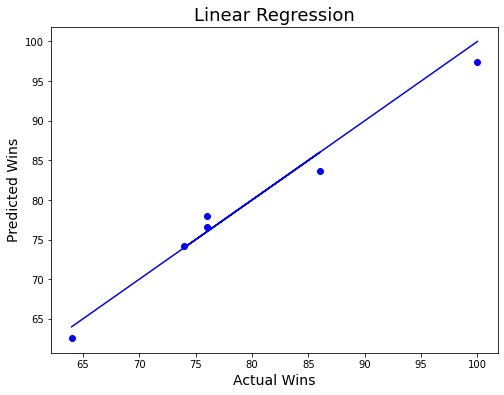

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins', fontsize=14)
plt.ylabel('Predicted Wins', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

 all the points are almost fitting the best fit line

In [123]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [124]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=8).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression 

In [125]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 1.7493877002485847
R2 Score is: 97.5754211327439
Cross Validation Score is: 35.5453456682674
R2 Score - Cross Validation Score is 62.0300754644765


In [126]:
#L1 -- Lasso Regression
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 1.720568570733847
R2 Score is: 97.65464737153397
Cross Validation Score is: 35.78411031874103
R2 Score - Cross Validation Score is 61.87053705279294


In [127]:
#L2 -- Ridge Regression
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 1.7463140121286211
R2 Score is: 97.58393365663636
Cross Validation Score is: 35.55700445110171
R2 Score - Cross Validation Score is 62.02692920553465


In [128]:
#Elastic Net
model=ElasticNet(alpha=0.01)
regressor(model, x, y)

Root Mean Square Error is: 1.4896724042331282
R2 Score is: 98.24189129864406
Cross Validation Score is: 37.83098850683923
R2 Score - Cross Validation Score is 60.41090279180483


### Support Vector Regression 

In [129]:
#Support Vector Regression
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 10.720045047685364
R2 Score is: 8.954727779962033
Cross Validation Score is: -53.14930438623553
R2 Score - Cross Validation Score is 62.10403216619756


In [130]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 10.996059832783402
R2 Score is: 4.205987093717189
Cross Validation Score is: -52.518962675127575
R2 Score - Cross Validation Score is 56.724949768844766


In [131]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 3.889008423372368
R2 Score is: 88.01765152697614
Cross Validation Score is: 26.694838950670867
R2 Score - Cross Validation Score is 61.32281257630527


### Decision Tree Regressor 

In [132]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 6.041522986797286
R2 Score is: 71.08274647887326
Cross Validation Score is: -205.76531295290349
R2 Score - Cross Validation Score is 276.84805943177673


### Random Forest Regressor

In [133]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 5.820571277804266
R2 Score is: 73.15920334507044
Cross Validation Score is: -23.749937056700148
R2 Score - Cross Validation Score is 96.90914040177059


### Extra Trees Regressor

In [134]:

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)


Root Mean Square Error is: 8.17059794833483
R2 Score is: 47.11020796654929
Cross Validation Score is: 1.3269788407201555
R2 Score - Cross Validation Score is 45.78322912582913


### Ada Boost Regressor

In [135]:

model=AdaBoostRegressor(random_state=47)
regressor(model, x, y)

Root Mean Square Error is: 6.588908016335986
R2 Score is: 65.60533630020866
Cross Validation Score is: -53.48143867370465
R2 Score - Cross Validation Score is 119.08677497391332


### Gradient Boosting Regressor

In [136]:

model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 5.544750727692296
R2 Score is: 75.64275125966564
Cross Validation Score is: -83.15842171574438
R2 Score - Cross Validation Score is 158.80117297541003


### SGD Regressor

In [137]:

model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 3.7218906604618414
R2 Score is: 89.02533179613577
Cross Validation Score is: 24.084495146266
R2 Score - Cross Validation Score is 64.94083664986977


### K Neighbors Regressor

In [138]:

model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 7.103520254071216
R2 Score is: 60.022887323943664
Cross Validation Score is: 7.4942196726864365
R2 Score - Cross Validation Score is 52.52866765125723


### Random Forest Regressor

In [139]:

model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 5.899095975938459
R2 Score is: 72.43010563380282
Cross Validation Score is: -9.993569294001958
R2 Score - Cross Validation Score is 82.42367492780478


# Hyper parameter tuning 

In [140]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [141]:
# creating parameters list to pass into GridSearchCV
parameters = {'alpha':[0.01],
              'copy_X' : [True, False],
              'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'positive' : [True, False],
              'random_state':[47,100,150],
              'selection' : ['cyclic', 'random']}

In [142]:
GCV = GridSearchCV(ElasticNet(), parameters, cv=8)
GCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=ElasticNet(),
             param_grid={'alpha': [0.01], 'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'random_state': [47, 100, 150],
                         'selection': ['cyclic', 'random']})

In [143]:
GCV.best_params_   

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': True,
 'positive': False,
 'random_state': 47,
 'selection': 'cyclic'}

In [144]:
final_model = ElasticNet(alpha = 0.01, copy_X = True, fit_intercept = True, normalize = True, positive = False, random_state = 100,selection = 'random')
final_fit = final_model.fit(x_train,y_train)   # final fit
final_pred = final_model.predict(x_test)   # predicting with best parameters
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 90.81461302416137


In [145]:
final_cv_score = (cross_val_score(final_model, x, y, cv=8).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 41.09139798939358


In [146]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 3.4049962644053062


 Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.



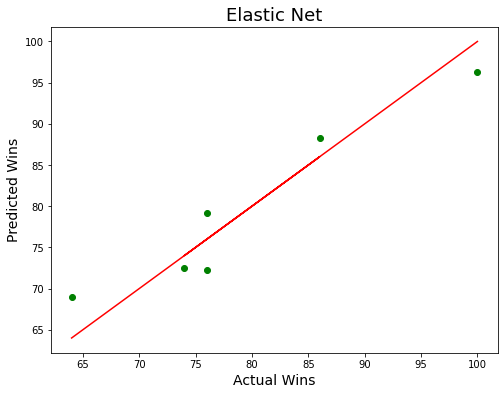

In [148]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Wins', fontsize=14)
plt.ylabel('Predicted Wins', fontsize=14)
plt.title('Elastic Net',fontsize=18)
plt.show()

Plotting the Final model actual Wins vs Predicted Wins

### Saving the model in pickle Format

In [149]:
# pickeling or serialization of a file
import pickle
filename = 'baseball_prediction_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# Prediction Conclusion:

In [150]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,100,96.302129
1,76,72.296748
2,74,72.501463
3,86,88.221941
4,76,79.195024
5,64,68.978439
